In [27]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence

# Données immobilières
immobilier = {
    'surface': [50, 80, 120, 100, 75],
    'chambres': [1, 2, 3, 2, 2],
    'etage': [2, 1, 3, 2, 4],
    'metro_distance': [200, 500, 1000, 300, 800],
    'annee_construction': [1990, 1985, 2010, 2000, 1995],
    'prix': [200000, 300000, 450000, 350000, 280000]
}

df = pd.DataFrame(immobilier)
X = df.drop('prix', axis=1)
y = df['prix']

rf = RandomForestRegressor(n_estimators=100, random_state=43).fit(X, y)

# pred
nouveau_bien = [[60, 2, 3, 400, 2005]]
prix_estime = rf.predict(nouveau_bien)[0]
print(f"Prix estimé: {prix_estime:,.0f}€")


Prix estimé: 310,800€


/home/zamiatine/Python-Artificial-Intelligence/ArtificialIntelligence/lib64/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


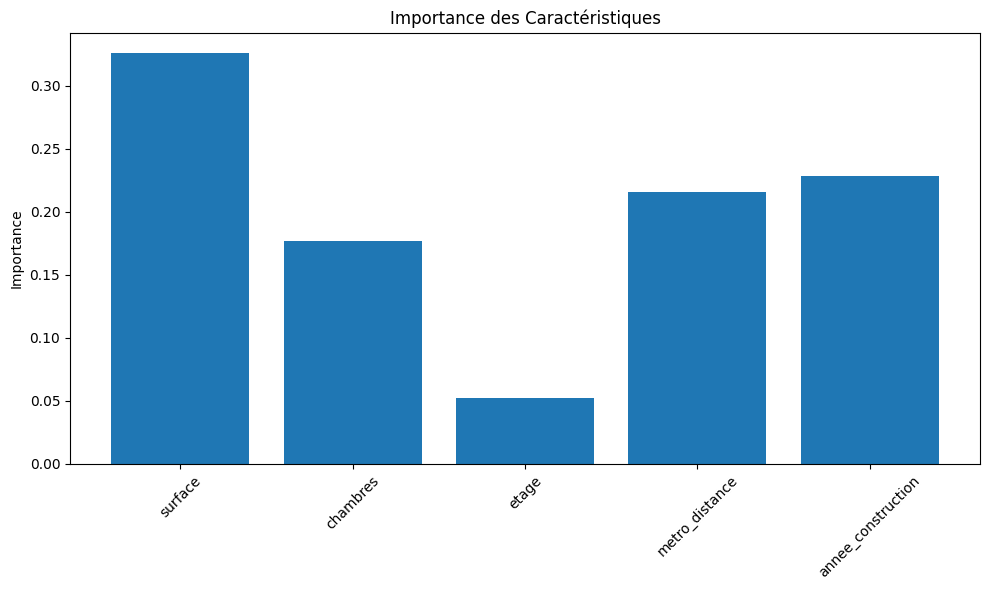

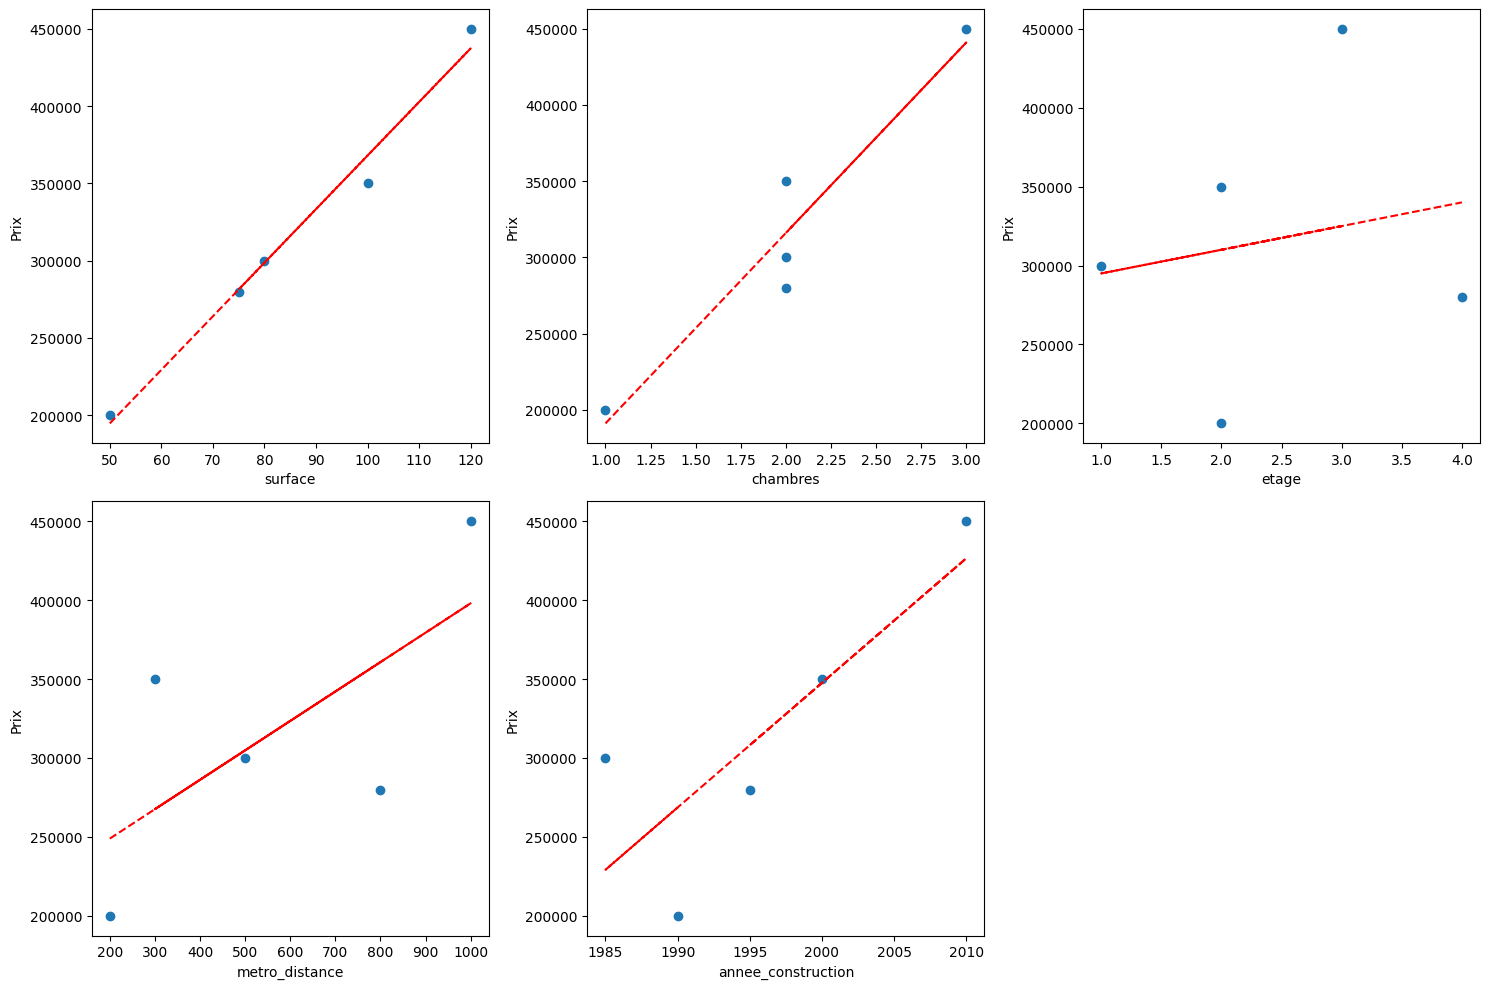

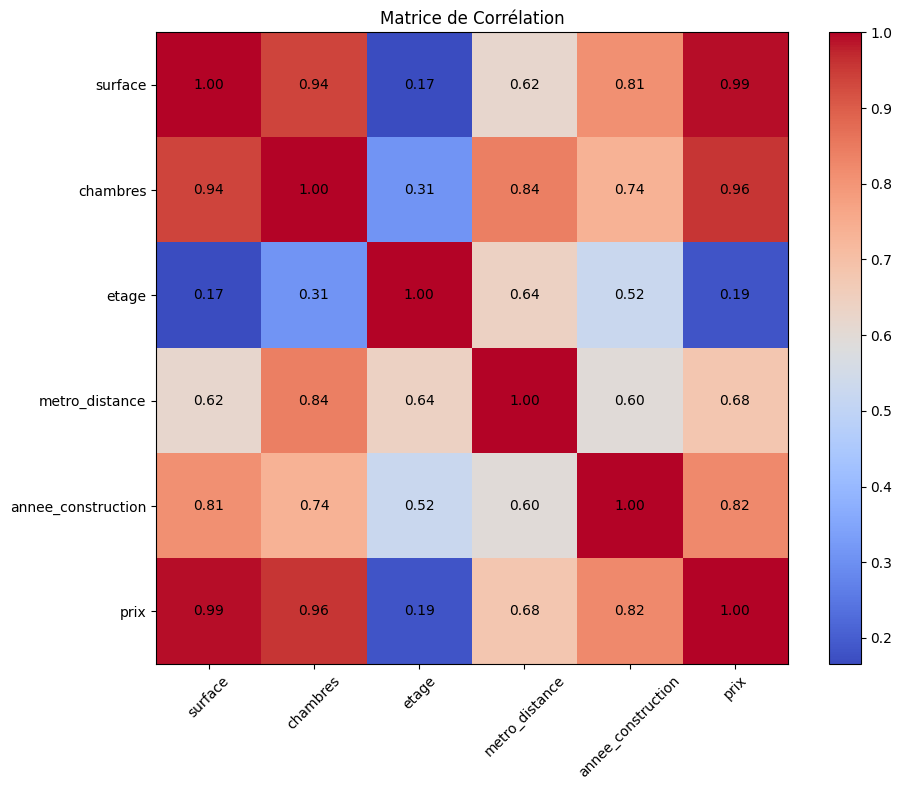

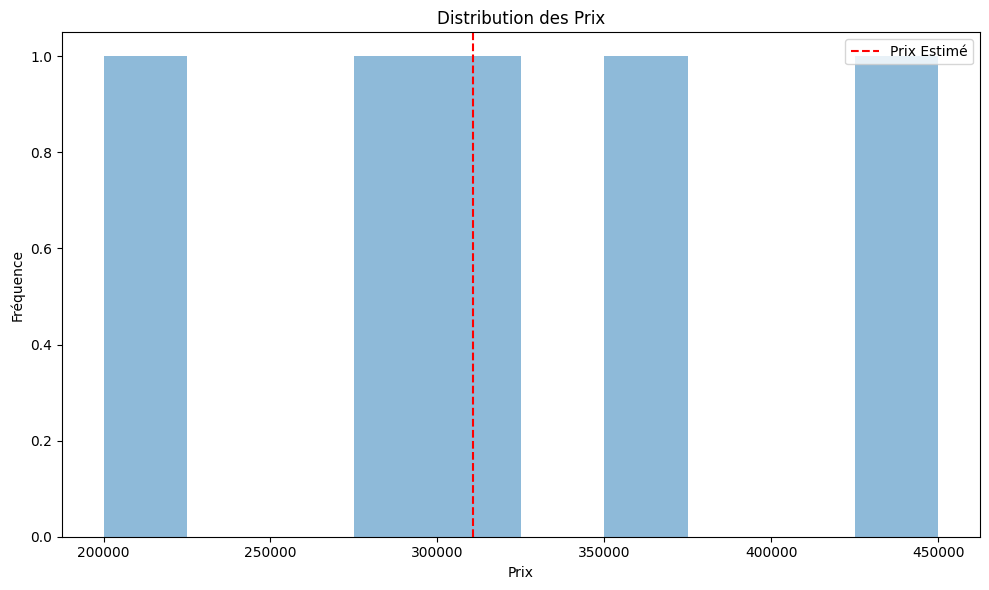

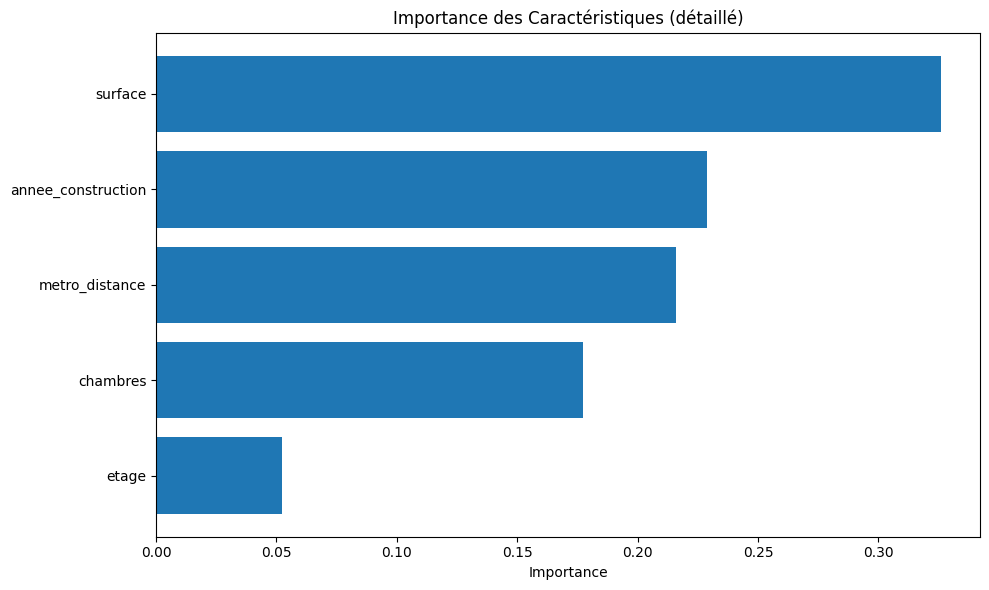


Importance des caractéristiques:
surface: 0.3259
chambres: 0.1772
etage: 0.0524
metro_distance: 0.2158
annee_construction: 0.2287


In [28]:
# 1. Importance des features
plt.figure(figsize=(10, 6))
plt.bar(X.columns, rf.feature_importances_)
plt.title('Importance des Caractéristiques')
plt.xticks(rotation=45)
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# 2. Relations entre features et prix
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[column], df['prix'])
    plt.xlabel(column)
    plt.ylabel('Prix')
    # Ligne de tendance
    z = np.polyfit(df[column], df['prix'], 1)
    p = np.poly1d(z)
    plt.plot(df[column], p(df[column]), "r--")
plt.tight_layout()
plt.show()

# 3. Matrice de corrélation
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
im = plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(im)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matrice de Corrélation')
# Ajout des valeurs dans les cases
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center')
plt.tight_layout()
plt.show()

# 4. Distribution des prix
plt.figure(figsize=(10, 6))
plt.hist(df['prix'], bins=10, alpha=0.5)
plt.axvline(prix_estime, color='red', linestyle='--', label='Prix Estimé')
plt.title('Distribution des Prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Feature importance détaillée
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importances['feature'], importances['importance'])
plt.title('Importance des Caractéristiques (détaillé)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Affichage des importances
print("\nImportance des caractéristiques:")
for name, importance in zip(X.columns, rf.feature_importances_):
    print(f"{name}: {importance:.4f}")

In [29]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

class ChatBotImmobilier:
    def __init__(self):
        self.data = {
            'surface': [50, 80, 120, 100, 75],
            'chambres': [1, 2, 3, 2, 2],
            'etage': [2, 1, 3, 2, 4],
            'metro_distance': [200, 500, 1000, 300, 800],
            'annee_construction': [1990, 1985, 2010, 2000, 1995],
            'prix': [200000, 300000, 450000, 350000, 280000],
            'parking' : [0, 1, 2, 2, 1]
        }
        
        df = pd.DataFrame(self.data)
        X = df.drop('prix', axis=1)
        y = df['prix']
        
        self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        self.model.fit(X, y)
    
    def discuter(self):
        print("Bonjour! Je suis votre assistant estimation immobilière! 🏠")
        
        try:
            surface = float(input("Quelle est la surface du bien (en m²)? "))
            chambres = int(input("Combien de chambres? "))
            etage = int(input("À quel étage? "))
            metro = float(input("Distance du métro (en mètres)? "))
            annee = int(input("Année de construction? "))
            parking = int(input("Combien de places de parking? "))
            
            prediction = self.model.predict([[surface, chambres, etage, metro, annee, parking]])[0]
            
            print(f"\nD'après mon analyse, le bien vaudrait environ: {prediction:,.0f}€")
            print("\nCette estimation est basée sur:")
            for name, importance in zip(self.data.keys(), self.model.feature_importances_):
                if name != 'prix':
                    print(f"- Impact de {name}: {importance:.1%}")
                    
        except ValueError:
            print("Désolé, je n'ai pas compris certaines valeurs.")

chatbot = ChatBotImmobilier()
chatbot.discuter()

Bonjour! Je suis votre assistant estimation immobilière! 🏠
Désolé, je n'ai pas compris certaines valeurs.
